In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [22]:
urls = ['https://www.eldiarioar.com/politica/33-asistentes-mesa-nacional-frente_1_9960969.html',
        'https://www.eldiarioar.com/politica/sorpresa-maximo-kirchner-sumo-mesa-nacional-frente_1_9960938.html',
        'https://www.eldiarioar.com/politica/intelecutuales-piden-alberto-fernandez-conceda-ciudadania-deportados-ortega-nicaragua_1_9960893.html',
        'https://www.eldiarioar.com/politica/lanza-larreta-no-descartan-desdoblamiento-elecciones-ciudad_1_9960581.html',
        'https://www.eldiarioar.com/politica/corte-suprema-rechazo-tomarle-juramento-senador-martin-donate_1_9960656.html',
        'https://www.eldiarioar.com/blog/un-trabajo-extraordinario-historias-e-ideas-sobre-maternidad-y-paternidad-en-argentina/son-madre-e-hija-hablan-experiencia-performance_132_9847885.html',
        'https://www.eldiarioar.com/blog/un-trabajo-extraordinario-historias-e-ideas-sobre-maternidad-y-paternidad-en-argentina/mama-activista-vih-cumpleanos-hijos-les-globos-preservativos_132_9759798.html',
        'https://www.eldiarioar.com/blog/un-trabajo-extraordinario-historias-e-ideas-sobre-maternidad-y-paternidad-en-argentina/maga-actriz-universidad-bebe-prefiero-hacerlo-no-hacerlo_132_9684863.html',
        'https://www.eldiarioar.com/blog/un-trabajo-extraordinario-historias-e-ideas-sobre-maternidad-y-paternidad-en-argentina/papa-adolescente-novia-trabaja-dia-retomo-secundario-noche-necesito-tiempo_132_9644994.html',
        'https://www.eldiarioar.com/blog/un-trabajo-extraordinario-historias-e-ideas-sobre-maternidad-y-paternidad-en-argentina/saquen-algoritmos-crianzas_132_9607246.html']
        

In [23]:
urls[0]

'https://www.eldiarioar.com/politica/33-asistentes-mesa-nacional-frente_1_9960969.html'

In [27]:
r = requests.get(urls[0])

In [28]:
soup = BeautifulSoup(r.content, 'html.parser')

In [31]:
#print (soup.prettify())

In [33]:
#print (soup.prettify())
soup.find('p', class_='article-text').text

'\nTodos los sectores que integran el Frente de Todos se dan cita esta noche en la sede del Partido Justicialista nacional, para participar por primera vez de la\xa0mesa nacional del espacio, a fin de empezar a escribir las reglas electorales.\n'

In [34]:
noticias = {}
for url in urls:
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'html.parser')
    parrafos = soup.find_all('p', class_='article-text')
    texto = ''
    for parrafo in parrafos:
        texto = texto + parrafo.text
    noticias[url] = texto

In [39]:
noticias[list(noticias.keys())[0]]

'\nTodos los sectores que integran el Frente de Todos se dan cita esta noche en la sede del Partido Justicialista nacional, para participar por primera vez de la\xa0mesa nacional del espacio, a fin de empezar a escribir las reglas electorales.\n\n        Con representantes de\xa0Alberto Fernández, Cristina Kirchner y Sergio Massa,\xa0además de la CGT, la CTA y los movimientos sociales, comienza a rodar la mesa electoral del oficialismo en la sede de Matheu 130.\n    \n“En la otra cuadra vi carteles de Alberto Presidente, Massa, (Daniel) Scioli también puede ser. Una vez que encontremos candidato y se empiece a discutir, el peronismo va a ser indestructible”,\xa0resaltó\xa0Pablo Moyano\xa0al ingresar al encuentro.\n    \n        Y enfatizó: “Vamos a recorrer y caminar el país para ganar. Más allá de la pandemia, de la guerra, el peronismo sigue siendo competitivo y con los candidatos que surjan de las PASO vamos a ir a las elecciones”.\n    \n        Alberto Fernández\n    \n        Edu

In [40]:
textos = pd.DataFrame([])
textos['url'] = noticias.keys()
textos['texto'] = textos['url'].apply(lambda x: noticias[x])
textos['Categoria'] = ['Politica','Politica','Politica','Politica','Politica','Sociedad','Sociedad','Sociedad','Sociedad','Sociedad']

In [41]:
textos

,url,texto,Categoria
0,https://www.eldiarioar.com/politica/33-asisten...,\nTodos los sectores que integran el Frente de...,Politica
1,https://www.eldiarioar.com/politica/sorpresa-m...,\n El diputado nacional y presidente de...,Politica
2,https://www.eldiarioar.com/politica/intelecutu...,\n Intelectuales agrupados en el espaci...,Politica
3,https://www.eldiarioar.com/politica/lanza-larr...,\n Funcionarios del gobierno porteño co...,Politica
4,https://www.eldiarioar.com/politica/corte-supr...,\n La Corte Suprema denegó este jueves ...,Politica
5,https://www.eldiarioar.com/blog/un-trabajo-ext...,\n Una madre y una hija se paran en un ...,Sociedad
6,https://www.eldiarioar.com/blog/un-trabajo-ext...,\n Roxana tiene 45 años. Nació en el Ch...,Sociedad
7,https://www.eldiarioar.com/blog/un-trabajo-ext...,\n La imagen tiene la suficiente potenc...,Sociedad
8,https://www.eldiarioar.com/blog/un-trabajo-ext...,"\n Sábado a la mañana, una dietética de...",Sociedad
9,https://www.eldiarioar.com/blog/un-trabajo-ext...,\n Cuando nació mi hijo mayor no sabía ...,Sociedad


In [10]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords 


In [42]:
spanishStemmer=SnowballStemmer("spanish")
stopwords_sp = stopwords.words('spanish')

# si no hacemos esto y usamos directo stopwords_sp, CountVectorizer devuelve un warning
stopwords_sp_stem = [spanishStemmer.stem(x) for x in stopwords_sp]

vectorizer = CountVectorizer(stop_words = stopwords_sp_stem, lowercase = True, strip_accents = 'unicode');

vectorizer.fit(textos['texto']);
print('Vocabulario:\n',vectorizer.vocabulary_) # vocabulario del corpus con la frecuencia de cada término


Vocabulario:
 {'todos': 2841, 'sectores': 2596, 'integran': 1565, 'frente': 1312, 'dan': 778, 'cita': 495, 'noche': 1977, 'sede': 2599, 'partido': 2106, 'justicialista': 1645, 'nacional': 1942, 'para': 2089, 'participar': 2102, 'primera': 2319, 'vez': 2998, 'mesa': 1858, 'espacio': 1130, 'fin': 1287, 'empezar': 1042, 'escribir': 1119, 'reglas': 2465, 'electorales': 1021, 'representantes': 2492, 'alberto': 151, 'fernandez': 1273, 'cristina': 712, 'kirchner': 1652, 'sergio': 2635, 'massa': 1816, 'ademas': 110, 'cgt': 463, 'cta': 723, 'movimientos': 1910, 'sociales': 2687, 'comienza': 535, 'rodar': 2540, 'electoral': 1020, 'oficialismo': 2024, 'matheu': 1824, '130': 5, 'cuadra': 725, 'vi': 3000, 'carteles': 436, 'presidente': 2303, 'daniel': 780, 'scioli': 2592, 'puede': 2380, 'encontremos': 1061, 'candidato': 411, 'empiece': 1045, 'discutir': 950, 'peronismo': 2174, 'va': 2945, 'indestructible': 1519, 'resalto': 2495, 'pablo': 2068, 'moyano': 1911, 'ingresar': 1540, 'encuentro': 1063, 'e

In [43]:
countvectorizer_encoding = vectorizer.transform(textos['texto'])

In [44]:
countvectorizer_encoding = vectorizer.transform(textos['texto'])
print('\n Transformamos los textos a una matriz esparsa:',type(countvectorizer_encoding))

data = pd.DataFrame(countvectorizer_encoding.todense(), 
             columns = vectorizer.get_feature_names_out()) # Usamos el método .todense() para ver la matriz completa


 Transformamos los textos a una matriz esparsa: <class 'scipy.sparse.csr.csr_matrix'>


In [49]:
data['madre']

0    0
1    0
2    0
3    0
4    0
5    7
6    2
7    6
8    2
9    1
Name: madre, dtype: int64

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

Tfidf_encoding=TfidfTransformer().fit_transform(countvectorizer_encoding);

data_2 = pd.DataFrame(Tfidf_encoding.todense(),columns=vectorizer.get_feature_names_out())

In [58]:
data_2

,000,10,100,12,13,130,14,140,15,16,...,vulneracion,wado,whatsapp,xxi,yasky,yendo,york,zamora,zona,zoom
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.066530,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066530,0.000000,0.000000,0.078262,0.000000,0.000000,0.078262,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.084081,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.084081,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.041029,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019729,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.019729,0.000000,0.014673,0.039458,0.000000,0.000000,0.000000
6,0.017154,0.030015,0.020179,0.020179,0.000000,0.000000,0.000000,0.020179,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.015007,0.000000,0.000000,0.040357,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024582,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018282,0.000000,0.000000,0.000000,0.024582
8,0.019307,0.016891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022712,...,0.090847,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.017245,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.046376,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


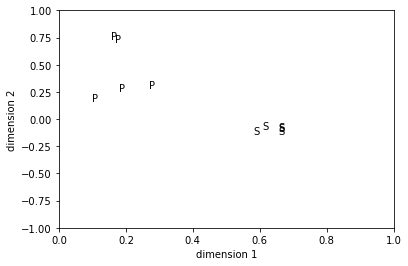

In [55]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2);
P = svd.fit_transform(Tfidf_encoding)

plt.figure()

for i in range(textos.shape[0]):
    plt.annotate(textos['Categoria'].iloc[i][0],P[i])
    
    

plt.xlabel('dimension 1')
plt.ylabel('dimension 2')
plt.axis([0, 1, -1, 1])
plt.show()

In [56]:
import numpy as np

In [57]:
n = 30
# coeficientes (pesos) de los términos en cada una de las dos dimensiones
comp1,comp2 = svd.components_ 

# los ordenamos de menor a mayor y nos quedamos con los índices de sus posiciones en el array
indices_1=np.argsort(comp1)
indices_2=np.argsort(comp2)

# invertimos para que queden ordenados de mayor a menor
indices_1=indices_1[::-1] 
indices_2=indices_2[::-1]

# Evaluamos los términos en estas posiciones
print('Dimension 1:')
print(np.array(vectorizer.get_feature_names_out())[indices_1[:n]])


print('Dimension 2:')
print(np.array(vectorizer.get_feature_names_out())[indices_2][:n])

Dimension 1:
['para' 'como' 'cuando' 'hijo' 'pero' 'mama' 'bebe' 'vih' 'anos' 'tiempo'
 'paola' 'vida' 'tiene' 'informacion' 'tenia' 'todo' 'despues' 'habia'
 'padres' 'lucas' 'hija' 'medico' 'casa' 'hijos' 'obra' 'porque' 'dos'
 'google' 'estaba' 'vez']
Dimension 2:
['kirchner' 'nacional' 'fernandez' 'alberto' 'sergio' 'sede' 'mesa'
 'massa' 'cristina' 'ministro' 'pj' 'reunion' 'vicepresidenta'
 'bonaerense' 'moyano' 'pablo' 'peronismo' 'santiago' 'elecciones'
 'palazzo' 'justicialista' 'anabel' 'abel' 'axel' 'larroque' 'partido'
 'mendoza' 'maximo' 'matheu' 'sagasti']
